In [1]:
import tensorflow as tf

C:\Users\uesr\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist=input_data.read_data_sets(train_dir='./Desktop/New folder/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./Desktop/New folder/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./Desktop/New folder/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./Desktop/New folder/t10k-images-idx3-ubyte.gz
Extracting ./Desktop/New folder/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
import matplotlib.pyplot as plt
% matplotlib inline

In [34]:
len(mnist.train.images)

55000

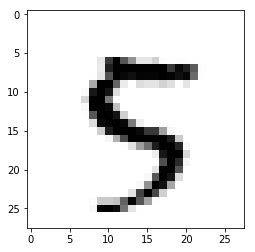

In [6]:
plt.imshow(mnist.train.images[164].reshape(28,28),cmap="Greys")

In [7]:
def generator(z,reuse=None):
    with tf.variable_scope('gen',reuse=reuse):
        hidden1=tf.layers.dense(z,units=128)
        alpha=0.01
        hidden1=tf.maximum(alpha*hidden1,hidden1)
        
        hidden2=tf.layers.dense(inputs=hidden1,units=128)
        
        hidden2=tf.maximum(alpha*hidden2,hidden2)
        
        output= tf.layers.dense(hidden2,units=784,activation=tf.tanh)
        return output
        

In [8]:
def discriminator(X,reuse=None):
    with tf.variable_scope('dis',reuse=reuse):
        hidden1=tf.layers.dense(inputs=X,units=128)
        alpha=0.01
        hidden1=tf.maximum(alpha*hidden1,hidden1)
        hidden2= tf.layers.dense(hidden1,units=128)
        hidden2=tf.maximum(alpha*hidden2,hidden2)
        
        logits=tf.layers.dense(inputs=hidden2,units=1)
        output=tf.sigmoid(logits)
        return output,logits
    

In [9]:
real_img=tf.placeholder(dtype=tf.float32,shape=[None,784] )
z=tf.placeholder(tf.float32,shape=[None,100])

In [10]:
G=generator(z)

In [11]:
d_output_real,d_log_real=discriminator(real_img)

In [12]:
d_output_fake,d_log_fake=discriminator(G,reuse=True)

In [13]:
def loss_func(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

In [16]:
d_real_loss=loss_func(d_log_real,tf.ones_like(tensor=d_log_real)*0.90)
d_fake_loss=loss_func(d_log_fake,tf.zeros_like(tensor=d_log_fake))

In [17]:
d_loss=d_real_loss+ d_fake_loss

In [19]:
g_loss=loss_func(d_log_fake,labels_in=tf.ones_like(tensor=d_log_fake))

In [20]:
learning_rate=0.001

In [24]:
vars_=tf.trainable_variables()
d_vars=[i for i in vars_ if 'dis' in  i.name]
g_vars=[i for i in vars_ if 'gen' in  i.name]

In [25]:
d_trainer=tf.train.AdamOptimizer(learning_rate).minimize(d_loss,var_list=d_vars)
g_trainer=tf.train.AdamOptimizer(learning_rate).minimize(g_loss,var_list=g_vars)

In [31]:
batch_size=100
epochs=1
samples=[]

In [29]:
init=tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        num_batches=mnist.train.num_examples//batch_size
        for i in range(num_batches):
            batch=mnist.train.next_batch(batch_size)
            batch_img=batch[0].reshape((batch_size,784))
            batch_img=batch_img*2-1
            
            batch_z=np.random.uniform(-1,1,size=(batch_size,100))
            
            _=sess.run(d_trainer,feed_dict={real_img:batch_img,z:batch_z})
            _=sess.run(g_trainer,feed_dict={z:batch_z})
            
            sample_z=np.random.uniform(-1,1,size=(1,100))
            gen_sample=sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
            samples.append(gen_sample)
            
        

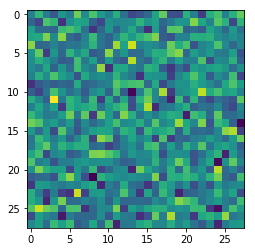

In [33]:
plt.imshow(samples[0].reshape(28,28))